In [1]:
pip install --upgrade tensorflow

     |████████████████████████████████| 173.9 MB 51.5 MB/s eta 0:00:01     |██████████████████████████      | 141.0 MB 31.5 MB/s eta 0:00:02
     |████████████████████████████████| 15.6 MB 21.6 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 39.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 38.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 5.2 MB/s  eta 0:00:01
     |████████████████████████████████| 10.6 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 33.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 116 kB 68.2 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 12.4 MB/s eta 0:00:01
     |███████████████████████████

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("bank.csv")  

df.shape

(10000, 14)

In [3]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
# dropping the columns which are unique for each row and also we dont need surname

df1=df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [14]:
df1.shape

(10000, 11)

In [15]:
df1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [16]:
df1.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
# estimated salary has 9999 unique values but its a float so its ok not to drop


# Bivariate Analysis 

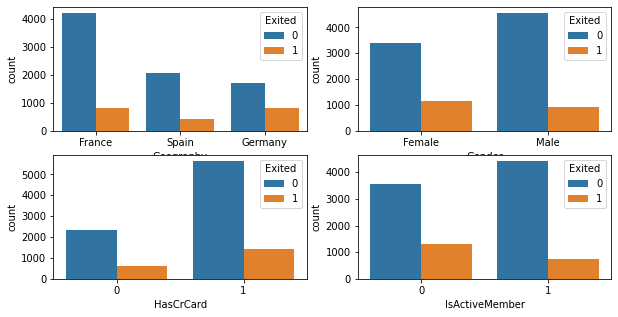

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 2, figsize=(10, 5))
sns.countplot(x='Geography', hue = 'Exited',data = df1, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df1, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df1, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df1, ax=axarr[1][1])

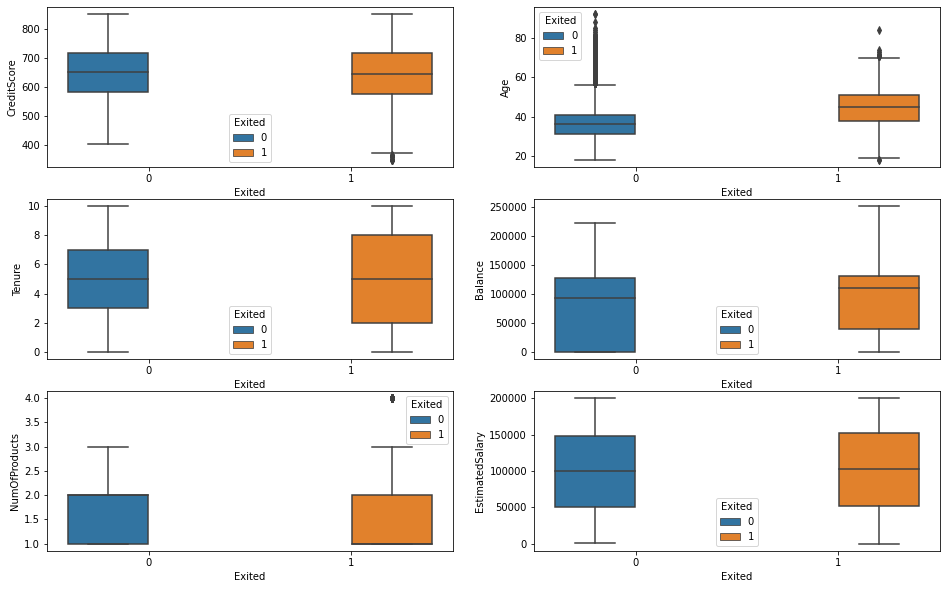

In [19]:
# Checking for continuous data points
fig, axarr = plt.subplots(3, 2, figsize=(16, 10))
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])


# Older people are getting exited which may be a risk and they might have more savings potentially and more spending power
# Looks like lower balance people are tending to stay and higher balance are tending to exit which is also a negative scenario 
# Rest of the data points doesnt give much information to differentiate 

# Test and Train Data set

In [21]:
#segregate input and output variables
X = df1.iloc[:, 0:10]
y = df1.iloc[:,10]

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
X = pd.get_dummies(X, columns=['Geography'])

In [24]:
X = pd.get_dummies(X, columns=['Gender'])

In [25]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [26]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [27]:
X.shape

(10000, 13)

In [28]:
y.shape

(10000,)

In [29]:
# Split the data up in train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [30]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [31]:
# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


ncols = X_train.shape[0]

# Initialize the constructor
model = Sequential()

# Add an first hidden layer 
model.add(Dense(25, activation='relu'))

#second hidden layer
model.add(Dense(25, activation='relu'))


# Add an output layer with one neuron and no activation specified
#model.add(Dense(1))
model.add(Dense(1, activation='sigmoid'))



In [40]:
optimizer = tf.keras.optimizers.Adam(0.01)


model.compile(loss='mean_squared_error',
              optimizer=optimizer , metrics = ['mae' , 'mse','accuracy'])
                   

epochs = 50

In [41]:
# history = model.fit(X_train, y_train, epochs=epochs, validation_split = 0.2, verbose = False)

# hist  = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# print(hist)


history = model.fit(X_train, y_train, epochs=50, validation_split = 0.2,batch_size = 10, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

        loss       mae       mse  ...   val_mse  val_accuracy  epoch
0   0.117825  0.212963  0.117825  ...  0.119107      0.844286      0
1   0.112755  0.214168  0.112755  ...  0.114294      0.848571      1
2   0.109973  0.207685  0.109973  ...  0.112783      0.852143      2
3   0.107184  0.204375  0.107184  ...  0.112924      0.849286      3
4   0.107714  0.205242  0.107714  ...  0.108616      0.852143      4
5   0.106283  0.200964  0.106283  ...  0.106737      0.855714      5
6   0.106799  0.201545  0.106799  ...  0.110952      0.852857      6
7   0.104798  0.197877  0.104798  ...  0.106561      0.856429      7
8   0.104953  0.200051  0.104953  ...  0.108178      0.851429      8
9   0.105140  0.197956  0.105140  ...  0.112572      0.849286      9
10  0.104850  0.196676  0.104850  ...  0.109891      0.854286     10
11  0.103795  0.194249  0.103795  ...  0.113225      0.844286     11
12  0.103516  0.195417  0.103516  ...  0.113048      0.848571     12
13  0.103887  0.191903  0.103887  

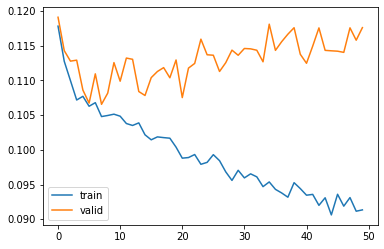

In [42]:
import matplotlib.pyplot as plt

plt.plot(hist['mse'])
plt.plot(hist['val_mse'])
plt.legend(("train" , "valid") , loc =0)

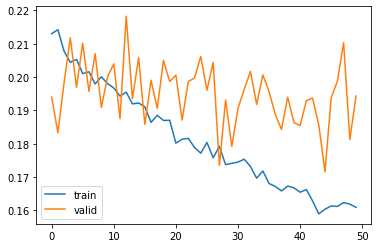

In [43]:
plt.plot(hist['mae'])
plt.plot(hist['val_mae'])
plt.legend(("train" , "valid") , loc =0)

In [36]:
#loss = model.evaluate(X_test, y_test, verbose=False)


In [37]:
# y_pred = np.round(model.predict(X_test))


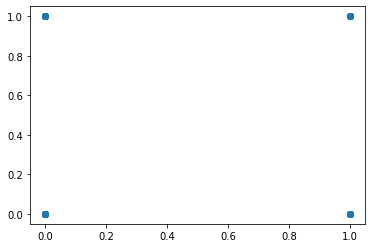

In [38]:
#import matplotlib.pyplot as plt
#plt.scatter(y_test, y_pred)

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred = np.where(y_pred > 0.5, 1,0)

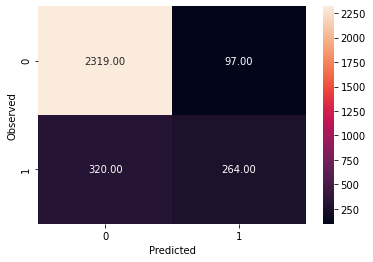

In [48]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

## importing necessary metrics to evaluate model performance
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

draw_cm(y_test,y_pred)

In [49]:
print("recall_score -",recall_score(y_test,y_pred))
print("precision_score -",precision_score(y_test,y_pred))
print("f1_score -",f1_score(y_test,y_pred))
print("roc_auc_score -",roc_auc_score(y_test,y_pred))
print("accuracy_score -",accuracy_score(y_test,y_pred))

recall_score - 0.4520547945205479
precision_score - 0.7313019390581718
f1_score - 0.5587301587301587
roc_auc_score - 0.7059528939490157
accuracy_score - 0.861
